# Cars4UProject

### Background and Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business.

### Data Dictionary


- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Code Start

In [1]:
##Make Python structure automatic
%load_ext nb_black

<IPython.core.display.Javascript object>

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn.linear_model as LinearRegressions
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<IPython.core.display.Javascript object>

### Load and Exploring the dataset

In [3]:
mydata = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

### Check the shape of the dataset

In [4]:
mydata.shape
print(f"There are {mydata.shape[0]} rows and {mydata.shape[1]} columns.")

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

### Info regarding column datatypes

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

### Get summary statistics for all colums

In [6]:
mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

### Reviewing a Sample of the Data

In [7]:
np.random.seed(
    5
)  # This seed number ensures that same random sample can be used later for further analysis
mydata.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1904,1904,Mercedes-Benz New C-Class 250 CDI Classic,Hyderabad,2012,41367,Diesel,Automatic,First,15.8 kmpl,2148 CC,170 bhp,5.0,NaN,18.49
7160,7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN
3854,3854,Hyundai Sonata GOLD,Chennai,2003,44200,Petrol,Manual,Second,11.7 kmpl,1997 CC,134 bhp,5.0,NaN,1.50
489,489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00
3819,3819,Renault Fluence 2.0,Jaipur,2011,63000,Petrol,Automatic,First,13.4 kmpl,1997 CC,135.1 bhp,5.0,NaN,4.75
453,453,Mitsubishi Cedia Sports,Chennai,2010,66000,Petrol,Manual,Second,13.17 kmpl,1999 CC,114 bhp,5.0,NaN,3.85
509,509,Mahindra XUV500 AT W8 FWD,Bangalore,2015,34000,Diesel,Automatic,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,13.00
5577,5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,2012,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,2.65
1778,1778,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Coimbatore,2017,19623,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,NaN,13.12
3440,3440,Ford Ecosport 1.5 DV5 MT Titanium Optional,Coimbatore,2014,70374,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,7.34


<IPython.core.display.Javascript object>

All the columns seem potentially relevant to the analysis therefore I will not drop any except for S.No. since we can use the default number 

In [8]:
mydata.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
mydata.info()  # This will show S.No. removed and down to 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

### Identifying missing values



In [10]:
mydata.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

There are many values missing that might be important for further analysis. I will start treating columns and missing values in the following section

In [11]:
print(f"There are {mydata.shape[0]} values and 6247 missing values in New_Price")

There are 7253 values and 6247 missing values in New_Price


<IPython.core.display.Javascript object>

In [12]:
print("The column represents")
print((6247 / 7253) * 100)
print("Percent of missing values")

The column represents
86.12987729215497
Percent of missing values


<IPython.core.display.Javascript object>

Due to this high percentage I will drop the column

In [13]:
mydata.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
mydata.isnull().sum().sort_values(ascending=False)
##checking if New_Price column is not in the dataset

Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

There are 1234 records missing dependent variable values. Since there is no way to obtain those values I will drop the rows

In [15]:
mydata.dropna(subset=["Price"], how="all", inplace=True)

<IPython.core.display.Javascript object>

In [16]:
mydata.isnull().sum().sort_values(
    ascending=False
)  # Checking for the next missing values problem

Seats                42
Engine               36
Power                36
Mileage               2
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Price                 0
dtype: int64

<IPython.core.display.Javascript object>

Analizing and missing data in seats, engine, power and mileage

In [17]:
mydata[mydata["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


<IPython.core.display.Javascript object>

In [18]:
mydata[mydata["Engine"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


<IPython.core.display.Javascript object>

In [19]:
mydata[mydata["Power"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


<IPython.core.display.Javascript object>

In [20]:
mydata.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<IPython.core.display.Javascript object>

### Removing all text in columns that are numeric and converting to float

In [21]:
def engine_to_num(engine):

    if isinstance(engine, str):
        return float(engine.replace(" CC", ""))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [22]:
mydata["Engine"] = mydata["Engine"].apply(engine_to_num)

<IPython.core.display.Javascript object>

In [23]:
mydata.Engine

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

<IPython.core.display.Javascript object>

In [24]:
mydata["Power"] = mydata["Power"].str.replace(r"\D", "")

<ipython-input-24-40d7cd6f2541>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mydata["Power"] = mydata["Power"].str.replace(r"\D", "")


<IPython.core.display.Javascript object>

In [25]:
mydata.Power

0       5816
1       1262
2        887
3       8876
4       1408
        ... 
6014      74
6015      71
6016     112
6017     671
6018     576
Name: Power, Length: 6019, dtype: object

<IPython.core.display.Javascript object>

In [26]:
mydata["Mileage"] = mydata["Mileage"].str.replace(r"\D", "")

<ipython-input-26-6601c4b3acaf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mydata["Mileage"] = mydata["Mileage"].str.replace(r"\D", "")


<IPython.core.display.Javascript object>

In [27]:
mydata.Mileage

0        266
1       1967
2        182
3       2077
4        152
        ... 
6014     284
6015     244
6016     140
6017     189
6018    2544
Name: Mileage, Length: 6019, dtype: object

<IPython.core.display.Javascript object>

In [28]:
mydata[["Engine", "Power", "Mileage"]] = mydata[["Engine", "Power", "Mileage"]].apply(
    pd.to_numeric
)

<IPython.core.display.Javascript object>

In [29]:
mydata.info()  ## Checking data types. All independent and dependent variable have the correct data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


<IPython.core.display.Javascript object>

In [30]:
mydata.Mileage.median()

230.0

<IPython.core.display.Javascript object>

In [31]:
mydata.Power.median()

838.0

<IPython.core.display.Javascript object>

In [32]:
mydata.Engine.median()

1493.0

<IPython.core.display.Javascript object>

In [33]:
mydata.Seats.median()

5.0

<IPython.core.display.Javascript object>

In [34]:
mydata.isnull().sum().sort_values(
    ascending=False
)  ##There seems to be more null values in Power after stripping the text

Power                143
Seats                 42
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

### Since the number of rows with null values compared to the total data set is low I will use the median values to impute the missing data

In [35]:
mydata["Power"].fillna(mydata["Power"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [36]:
mydata["Seats"].fillna(mydata["Seats"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [37]:
mydata["Engine"].fillna(mydata["Engine"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [38]:
mydata["Mileage"].fillna(mydata["Mileage"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [39]:
mydata.isnull().sum().sort_values(
    ascending=False
)  ## No null values and correct data types

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

## Distribution Plots

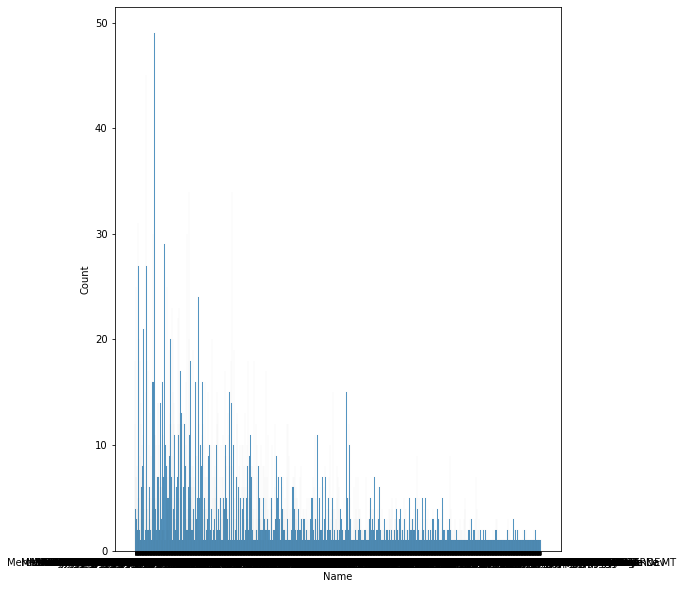

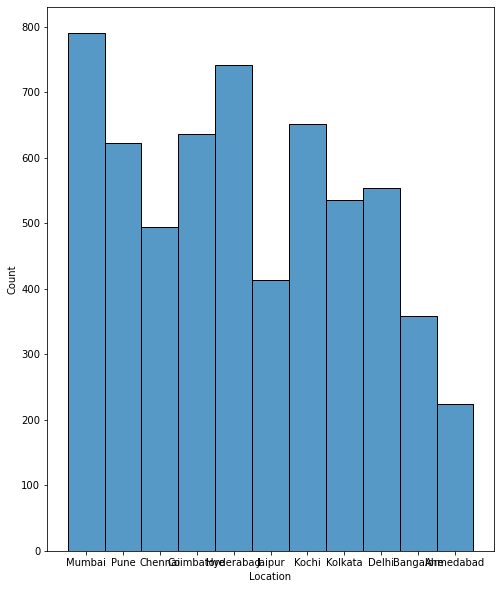

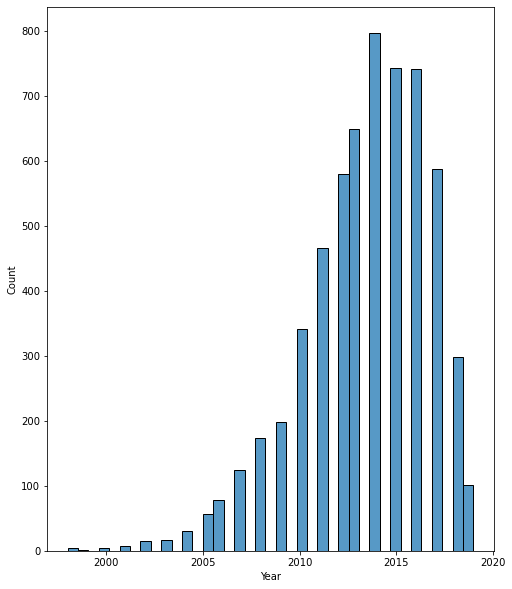

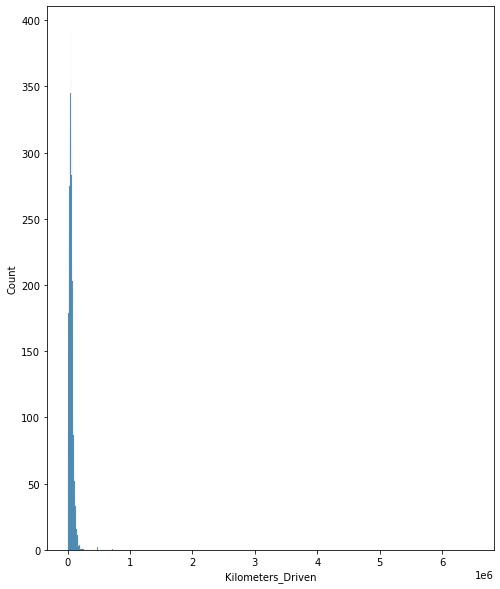

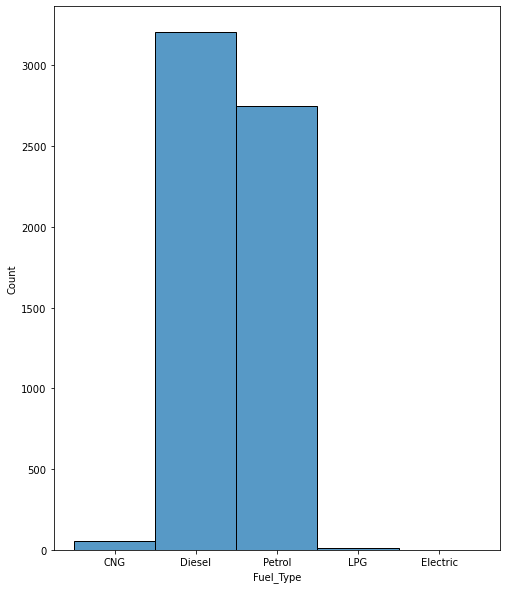

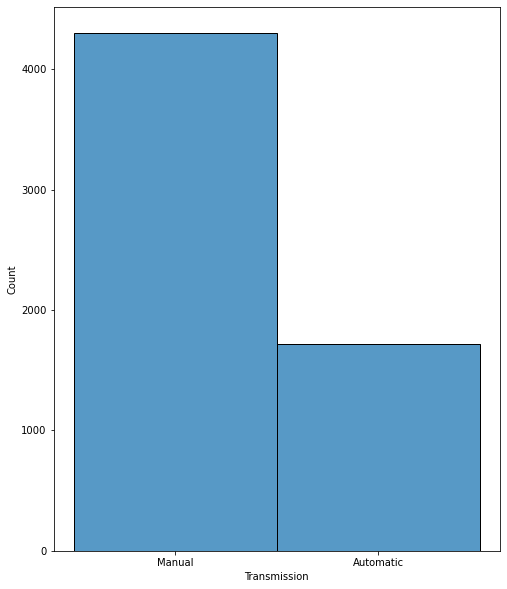

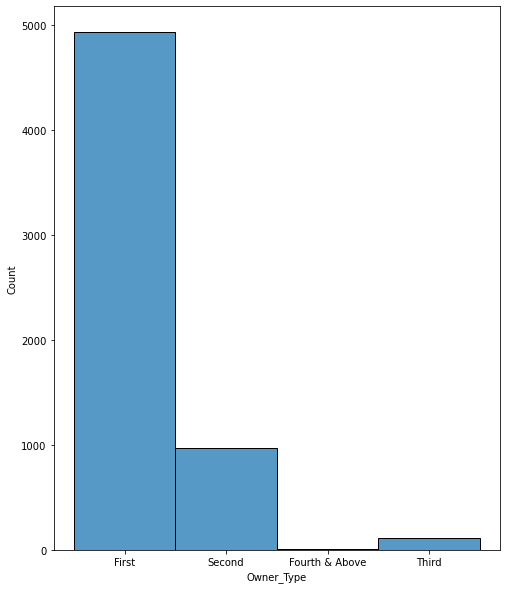

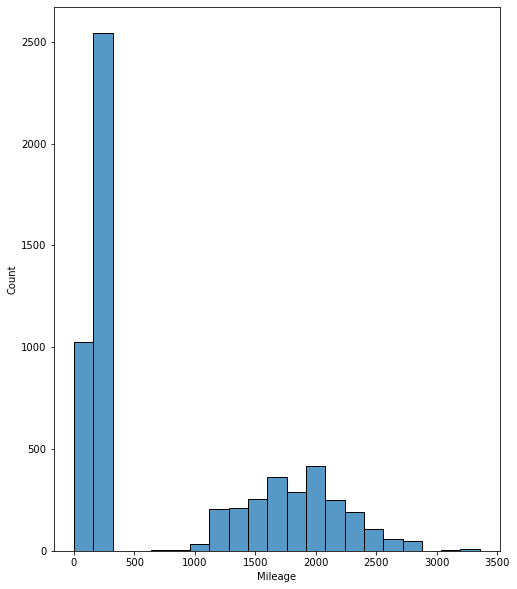

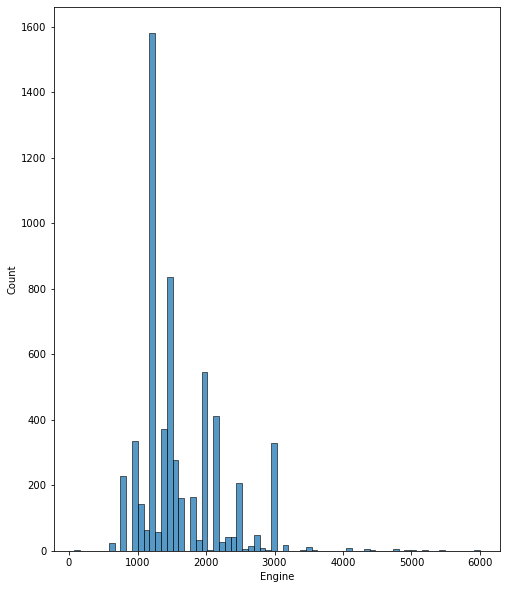

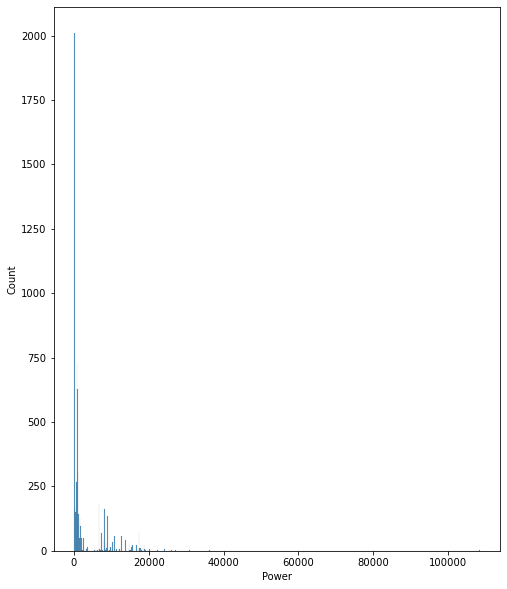

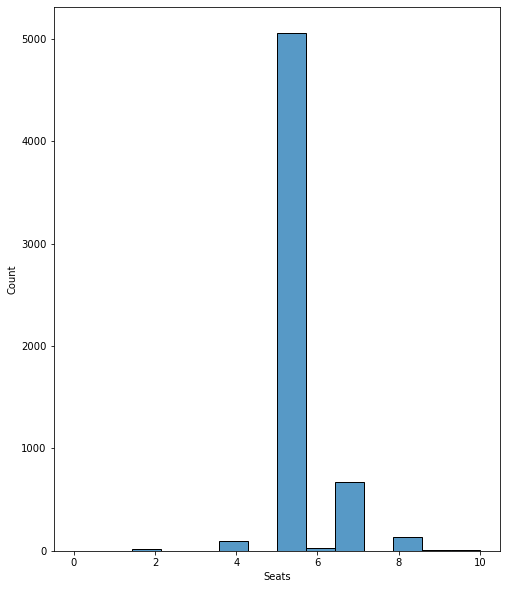

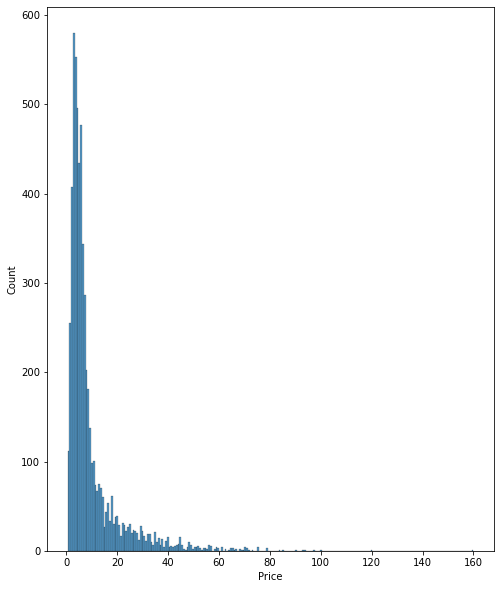

<IPython.core.display.Javascript object>

In [40]:
import seaborn as sns

for i in mydata.columns:
    plt.figure(figsize=(8, 10))
    sns.histplot(data=mydata, x=i)
    plt.show()

Scatterplots for features and the target variable `Price` 

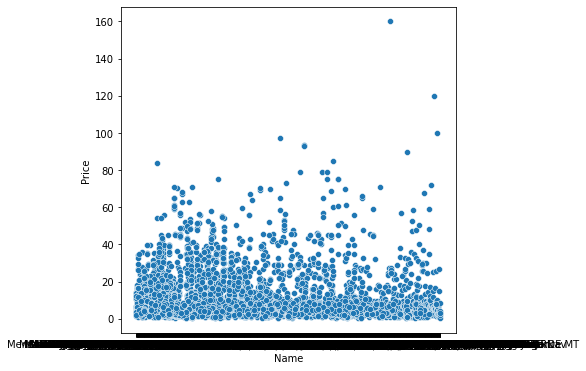

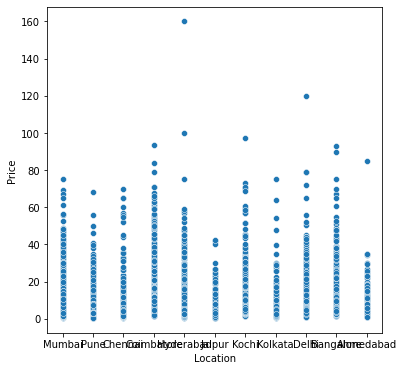

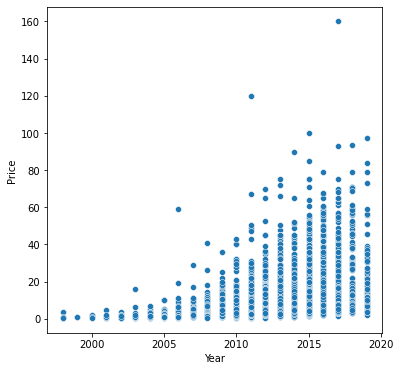

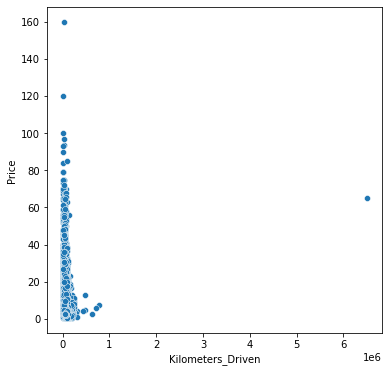

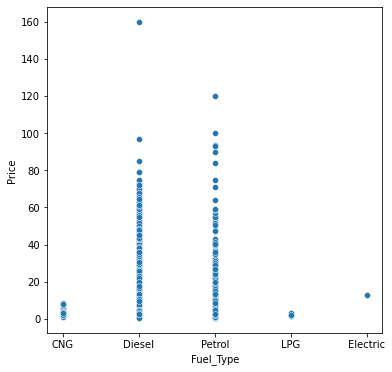

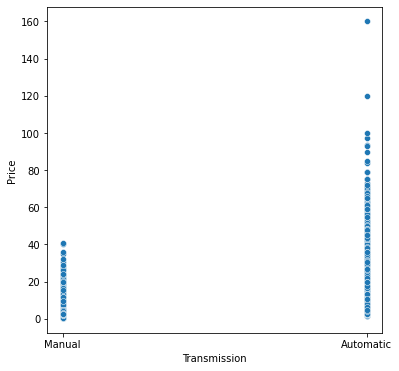

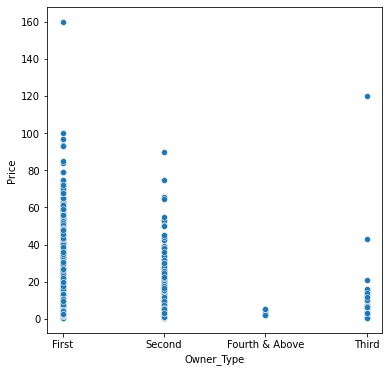

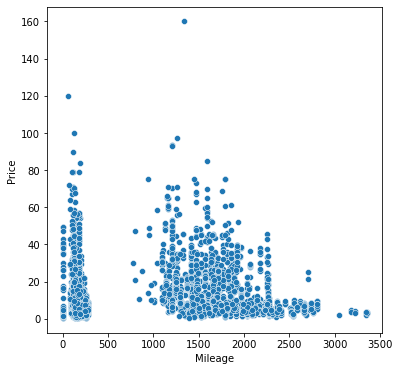

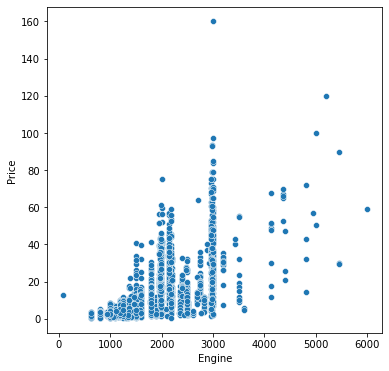

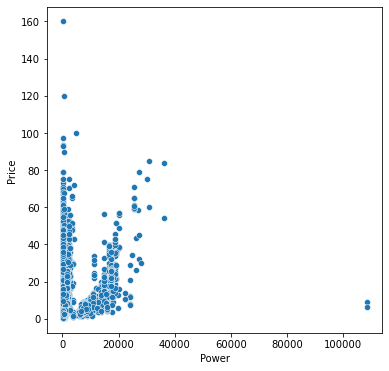

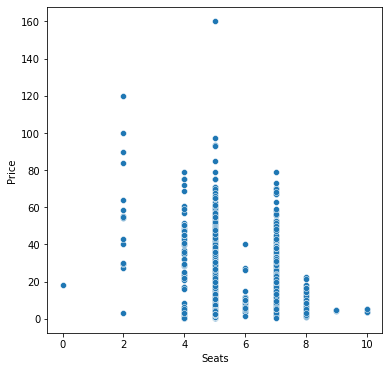

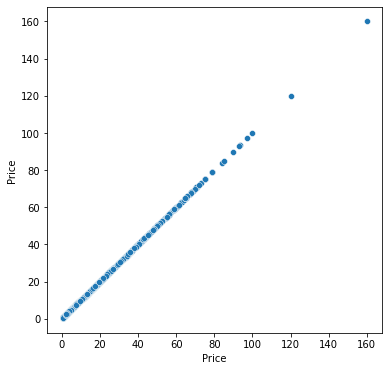

<IPython.core.display.Javascript object>

In [41]:
for i in mydata.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=mydata, x=i, y="Price")
    plt.show()

## From plots it is difficult to see all correlation. The following heatmap provides more information


**Plot the correlation heatmap and list your observations.**

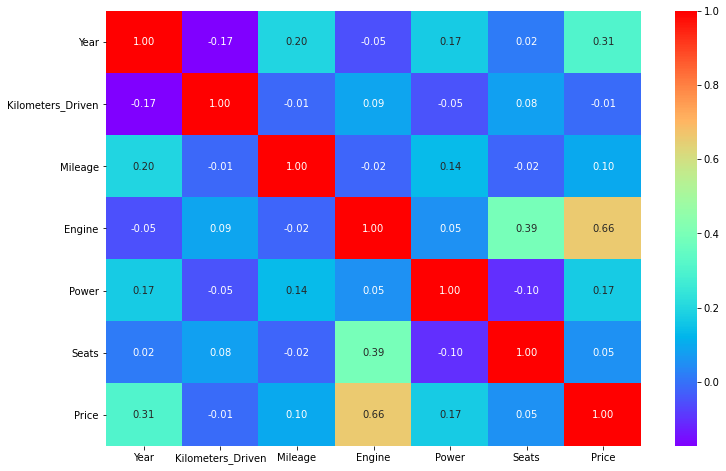

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(mydata.corr(), annot=True, fmt=".2f", cmap="rainbow")
plt.show()

The correlation heatmap does not show colinearity as correlation is not high

## Model Building

In [43]:
mydata1 = mydata.copy()

<IPython.core.display.Javascript object>

In [44]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


<IPython.core.display.Javascript object>

In [45]:
ind_vars = mydata1.drop(["Price"], axis=1)

dep_var = mydata1[["Price"]]

<IPython.core.display.Javascript object>

In [46]:
ind_vars = ind_vars.drop(["Name"], axis=1)

<IPython.core.display.Javascript object>

In [47]:
ind_vars

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Mumbai,2010,72000,CNG,Manual,First,266.0,998.0,5816.0,5.0
1,Pune,2015,41000,Diesel,Manual,First,1967.0,1582.0,1262.0,5.0
2,Chennai,2011,46000,Petrol,Manual,First,182.0,1199.0,887.0,5.0
3,Chennai,2012,87000,Diesel,Manual,First,2077.0,1248.0,8876.0,7.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,1968.0,1408.0,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,284.0,1248.0,74.0,5.0
6015,Jaipur,2015,100000,Diesel,Manual,First,244.0,1120.0,71.0,5.0
6016,Jaipur,2012,55000,Diesel,Manual,Second,140.0,2498.0,112.0,8.0
6017,Kolkata,2013,46000,Petrol,Manual,First,189.0,998.0,671.0,5.0


<IPython.core.display.Javascript object>

In [48]:
pd.get_dummies(ind_vars["Location"], drop_first=True)

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [49]:
categorical_cols = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

ind_vars = pd.get_dummies(ind_vars, columns=categorical_cols)

<IPython.core.display.Javascript object>

In [50]:
ind_vars

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,266.0,998.0,5816.0,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,1967.0,1582.0,1262.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2011,46000,182.0,1199.0,887.0,5.0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,2077.0,1248.0,8876.0,7.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
4,2013,40670,152.0,1968.0,1408.0,5.0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,284.0,1248.0,74.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,244.0,1120.0,71.0,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,140.0,2498.0,112.0,8.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,189.0,998.0,671.0,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


<IPython.core.display.Javascript object>

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [52]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in train data = 1806


<IPython.core.display.Javascript object>

In [53]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [54]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.853784
Kilometers_Driven,-0.000036
Mileage,0.000319
Engine,0.011496
Power,0.000060
Seats,-2.314855
Location_Ahmedabad,-0.746832
Location_Bangalore,1.708285
Location_Chennai,0.240387
Location_Coimbatore,1.761601


<IPython.core.display.Javascript object>

In [55]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [56]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  6.794704  4.032988  0.638938      0.636522


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  8.559398  3.966145  0.383068      0.373347


<IPython.core.display.Javascript object>

### Conclusions
My model did not achieve minimum performance.
R^2 is very low in both train and test sets
The model needs to be re-visited
Potentially the treatment of missing values and not transforming to a log scale are the causes of this issue
